<a href="https://colab.research.google.com/github/ashishghanta/ml-learning-log_25/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [316]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [317]:
df = pd.read_csv(url)

In [318]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [319]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [320]:
df.dtypes

,0
engine_displacement,int64
num_cylinders,float64
horsepower,float64
vehicle_weight,float64
acceleration,float64
model_year,int64
origin,object
fuel_type,object
drivetrain,object
num_doors,float64


In [321]:
base = df.columns.tolist()

In [322]:
base

['engine_displacement',
 'num_cylinders',
 'horsepower',
 'vehicle_weight',
 'acceleration',
 'model_year',
 'origin',
 'fuel_type',
 'drivetrain',
 'num_doors',
 'fuel_efficiency_mpg']

In [323]:
base = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
]

In [324]:
base

['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

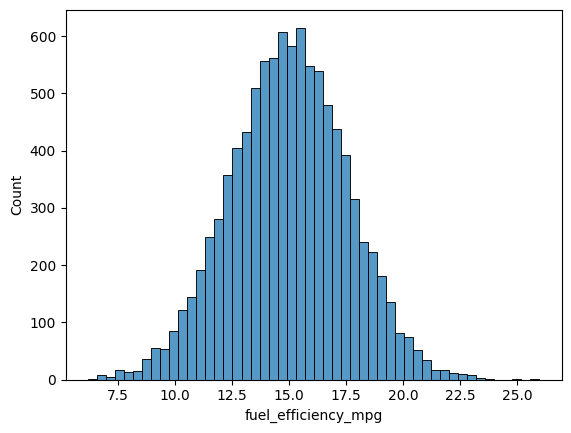

In [325]:
sns.histplot(df.fuel_efficiency_mpg, bins = 50)

In [326]:
df.isnull().sum() #horsepower column has null values

,0
engine_displacement,0
num_cylinders,482
horsepower,708
vehicle_weight,0
acceleration,930
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,502


In [327]:
df.horsepower.describe()  # Median horsepower varilable is 149

,horsepower
count,8996.000000
mean,149.657292
std,29.879555
min,37.000000
25%,130.000000
50%,149.000000
75%,170.000000
max,271.000000


In [328]:
n = len(df)

In [329]:
n

9704

In [330]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [331]:
n_train,n_val,n_test

(5824, 1940, 1940)

In [332]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [333]:
idx = np.arange(n)

In [334]:
idx

array([   0,    1,    2, ..., 9701, 9702, 9703])

In [335]:
np.random.seed(42)
np.random.shuffle(idx)

In [336]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [337]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [338]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [339]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [340]:
df_val

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,180,0.0,112.0,2772.134410,15.9,2020,Europe,Gasoline,Front-wheel drive,3.0,15.366341
1,260,5.0,138.0,3014.061530,NaN,2022,Europe,Gasoline,Front-wheel drive,-2.0,14.601182
2,140,7.0,181.0,3652.186151,NaN,2016,USA,Diesel,All-wheel drive,1.0,12.247032
3,270,4.0,105.0,2753.040847,16.3,2023,Asia,Gasoline,Front-wheel drive,0.0,15.136400
4,170,4.0,224.0,4163.375137,11.9,2003,USA,Gasoline,Front-wheel drive,0.0,10.340419
...,...,...,...,...,...,...,...,...,...,...,...
1935,290,2.0,205.0,3403.401496,15.9,2019,USA,Gasoline,Front-wheel drive,1.0,13.868607
1936,200,8.0,159.0,2752.516039,16.7,2009,Europe,Gasoline,All-wheel drive,-1.0,15.665403
1937,230,3.0,202.0,3303.000688,NaN,2008,Europe,Diesel,Front-wheel drive,-1.0,13.613127
1938,220,4.0,169.0,3293.420251,13.2,2008,Asia,Diesel,All-wheel drive,1.0,13.733343


In [341]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
1,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
2,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
3,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
4,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209
...,...,...,...,...,...,...,...,...,...,...,...
5819,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0,16.964054
5820,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0,10.059094
5821,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0,17.593237
5822,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0,18.925748


In [342]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [343]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [344]:
y_train

array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
       2.94261017])

<Axes: ylabel='Count'>

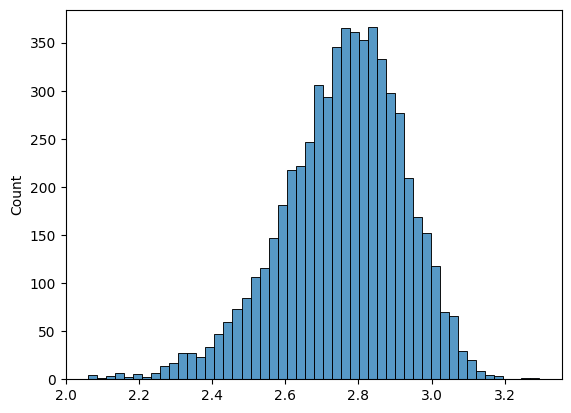

In [345]:
sns.histplot(y_train, bins = 50)

## Q3

In [346]:
## fill it with 0

In [347]:
base = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
]

In [348]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [349]:
def prepare_X(df, base):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [350]:
X_train = prepare_X(df_train,base)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [351]:
w0

np.float64(3.6646662472218297)

In [352]:
w

array([ 2.14827083e-06,  2.21209296e-04, -3.23460699e-04,  1.64673232e-05])

In [353]:
X_val = prepare_X(df_val,base)
y_pred = w0 + X_val.dot(w)

In [354]:
y_pred

array([2.82641584, 2.75411816, 2.55686533, ..., 2.6745201 , 2.67029761,
       2.85296899])

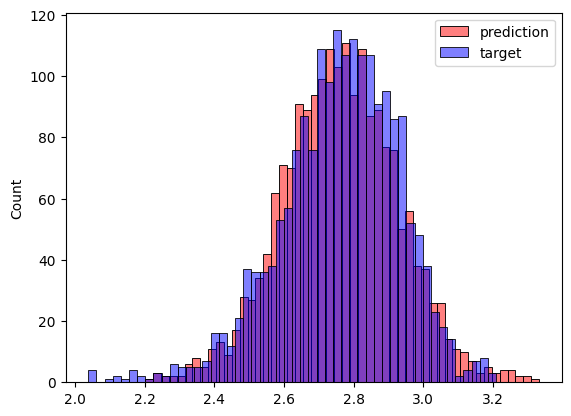

In [355]:

sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

In [356]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [357]:
round(rmse(y_val, y_pred),2)

np.float64(0.04)

In [358]:
# fill it with mean

In [359]:
df_train.horsepower.mean()

np.float64(149.54476367006487)

In [360]:
df_train['horsepower'] = df_train.horsepower.fillna(df_train.horsepower.mean())

In [361]:
df_train.isnull().sum()

,0
engine_displacement,0
num_cylinders,307
horsepower,0
vehicle_weight,0
acceleration,551
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,289


In [362]:
X_train = prepare_X(df_train,base)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [363]:
w0

np.float64(3.671000819543139)

In [364]:
w

array([ 3.63140955e-06,  6.65758686e-04, -3.23242585e-04, -2.14173526e-05])

In [365]:
#df_val['horsepower'] = df_val.horsepower.fillna(df_train.horsepower.mean())
X_val = prepare_X(df_val,base)
y_pred = w0 + X_val.dot(w)

In [366]:
y_pred

array([2.8068845 , 2.74624076, 2.56829206, ..., 2.69564277, 2.67673323,
       2.83627891])

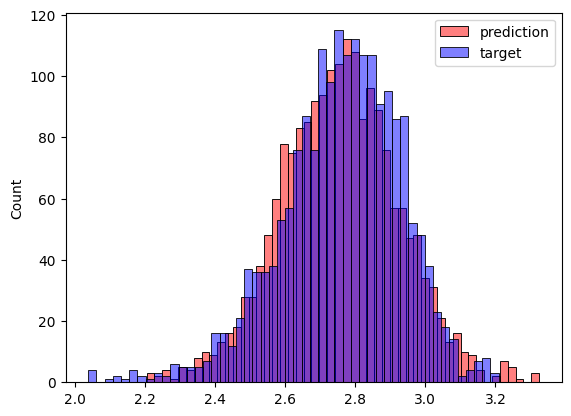

In [367]:

sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

In [368]:
round(rmse(y_val, y_pred),2)

np.float64(0.04)

In [369]:
# both are equally good

## Q4

In [370]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [371]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train,base)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val,base)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 3.671000819543139 0.0449711964796841
0.01 3.1742903421518887 0.04496610070522139
0.1 1.4313056572071425 0.04542695888308467
1 0.22050883251941106 0.04617559872820207
5 0.046328721228317035 0.046311164761328474
10 0.023311899846066072 0.046329581338838514
100 0.002345394210173959 0.04634625360928847


In [372]:
# the best value to pick is 0.01

## Q5

In [373]:
n = len(df)

In [374]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [375]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [376]:
idx = np.arange(n)

In [377]:
score_values=[]

In [378]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  np.random.seed(42)
  np.random.shuffle(idx)

  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]

  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
  y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
  y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

  del df_train['fuel_efficiency_mpg']
  del df_val['fuel_efficiency_mpg']
  del df_test['fuel_efficiency_mpg']

  base = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
  ]

  def prepare_X(df, base):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

  def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


  X_train = prepare_X(df_train,base)

  w0, w = train_linear_regression(X_train, y_train)

  y_pred = w0 + X_train.dot(w)

  X_val = prepare_X(df_val,base)
  y_pred = w0 + X_val.dot(w)

  score_values.append(rmse(y_val, y_pred))



In [379]:
sv = np.array(score_values)

In [380]:
std_dev = np.std(sv)

In [381]:
round(std_dev,3)

np.float64(0.001)

In [382]:
# the std for the above is 0.001

Q6

In [383]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

base = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
]

def prepare_X(df, base):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X


In [384]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [385]:
df_full_train = pd.concat([df_train, df_val])

In [386]:
df_full_train = df_full_train.reset_index(drop=True)


In [387]:


X_full_train = prepare_X(df_full_train,base)



In [388]:


X_full_train



array([[ 190.        ,  162.        , 2939.32486089, 2018.        ],
       [ 140.        ,    0.        , 2783.09048167, 2014.        ],
       [ 230.        ,  125.        , 2992.66512443, 2016.        ],
       ...,
       [ 200.        ,  152.        , 2584.45465589, 2020.        ],
       [ 270.        ,  110.        , 3797.71680161, 2010.        ],
       [ 200.        ,  161.        , 2522.30287611, 2016.        ]])

In [389]:
y_full_train = np.concatenate([y_train, y_val])


In [390]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [396]:
X_test = prepare_X(df_test,base)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score,2)

np.float64(0.04)